In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

In [ ]:
salary_df = pd.read_csv("https://richardson.byu.edu/220/ds_salary.csv")
salary_df.head()

,...1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


##1. General Salary Data:
Start by plotting and describing the general shape of the salary data. This initial
step sets the foundation for your analysis.

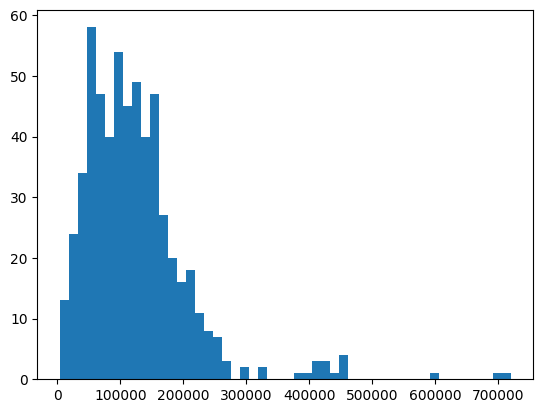

In [ ]:
plt.hist(salary_df["salary"], bins=50)
plt.show()

In [ ]:
salary_df["salary"].describe()

,salary
count,581.000000
mean,123685.096386
std,85286.402256
min,4000.000000
25%,67000.000000
50%,110000.000000
75%,157000.000000
max,720000.000000


**ANALYSIS**:
Reported salaries range anywhere from 4k-720k USD, however the majority report salaries under 200k.
The distribution of salaries has a median of 110k and is skewed right. The mean is slightly impacted by this skew and as well as some outliers, shifting it to around 124k.

##2. Effect of Experience on Salary:
Investigate how experience influences data scientist salaries. Create visualizations or
tables to illustrate any trends or patterns.



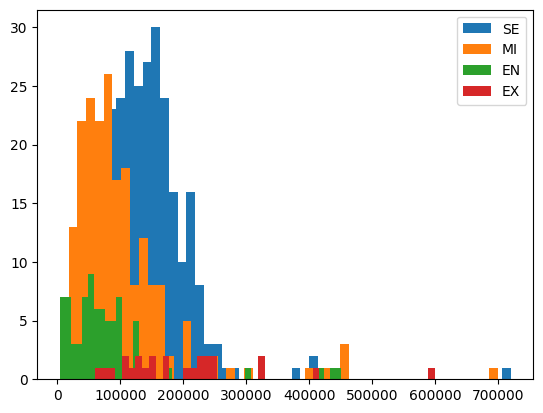

In [ ]:
SE_salary_df = salary_df[salary_df["experience_level"] == "SE"]
MI_salary_df = salary_df[salary_df["experience_level"] == "MI"]
EN_salary_df = salary_df[salary_df["experience_level"] == "EN"]
EX_salary_df = salary_df[salary_df["experience_level"] == "EX"]

plt.hist(SE_salary_df["salary"], bins=50, label="SE")
plt.hist(MI_salary_df["salary"], bins=50, label="MI")
plt.hist(EN_salary_df["salary"], bins=50, label="EN")
plt.hist(EX_salary_df["salary"], bins=50, label="EX")
plt.legend()
plt.show()

In [ ]:
import tabulate as tab
data = []
for df in [EX_salary_df, SE_salary_df, MI_salary_df, EN_salary_df]:
    data.append([df["experience_level"].iloc[0], df["salary"].mean(), df["salary"].median(), df["salary"].std(), len(df["salary"]), df["salary"].min(), df["salary"].max()])
print(tab.tabulate(data, headers=["Experience Level", "Mean", "Median", "Standard Deviation", "count", "min", "max"]))

Experience Level        Mean    Median    Standard Deviation    count    min     max
------------------  --------  --------  --------------------  -------  -----  ------
EX                  204155      175000              119065         25  59000  600000
SE                  142567      138600               66847.1      275  24000  720000
MI                  103480       80000               89008.3      201   4000  700000
EN                   84397.2     65000               87454.6       80   4000  450000


**ANALYSIS**:
Unsuprisingly the more experience an employee has the more money they make. What we did find interesting, however, was the apparent plateu in salaries among senior data scientists. We can observe that senior data scientists make up the largest portion of our sample population. At the same time the salaries reported by these senior employees have a significantly smaller standard deviation meaning the majority of salaries from all companies tend to fall into a tighter range.


Of course, we are making some assumptions about how the data was collected in order to make judgements about the population at a particular company.

##3. Impact of Company Size on Salary:
Explore how company size affects data scientist salaries. Generate plots or tables to
visualize this relationship.



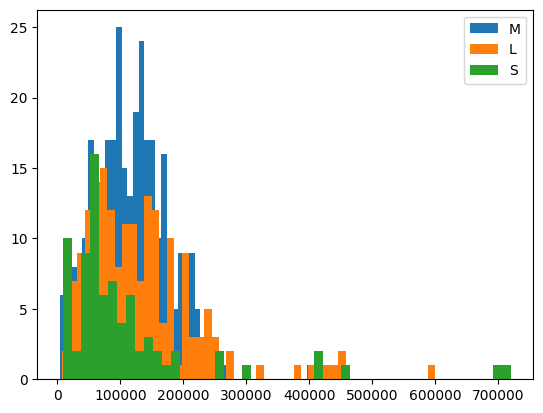

In [ ]:
S_salary_df = salary_df[salary_df["company_size"] == "S"]
M_salary_df = salary_df[salary_df["company_size"] == "M"]
L_salary_df = salary_df[salary_df["company_size"] == "L"]

plt.hist(M_salary_df["salary"], bins=50, label="M")
plt.hist(L_salary_df["salary"], bins=50, label="L")
plt.hist(S_salary_df["salary"], bins=50, label="S")

plt.legend()
plt.show()

In [ ]:
import tabulate as tab
data = []
for df in [S_salary_df, M_salary_df, L_salary_df]:
    data.append([df["company_size"].iloc[0], df["salary"].mean(), df["salary"].median(), df["salary"].std(), len(df["salary"]), df["salary"].min(), df["salary"].max()])
print(tab.tabulate(data, headers=["Company Size", "Mean", "Median", "Standard Deviation", "count", "min", "max"]))

Company Size      Mean    Median    Standard Deviation    count    min     max
--------------  ------  --------  --------------------  -------  -----  ------
S               113012     74500              130882         78   9272  720000
M               120767    115934               64107.6      321   4000  450000
L               133405    115000               92713.2      182   8000  600000


**ANALYSIS**: For the median employee, there is little to no difference in salary between working at a medium sized company or a large one. If the employee is somewhat competitive and considers themself above average, a larger company will result in slighly larger combensation. If the employee knows they have what it takes to be one of the top earners wherever they are at, they will actually find the highest compensation at a smaller company.

It is important to note however that smaller companies have a higher failure rate than their bigger counterparts. This means that an overachieving data scientist will need to make a real impact in their small company and be okay with the risks involved.

##4. Job Title Analysis:
Job titles can vary significantly. For this project, select a keyword or phrase to distinguish between different job titles. For instance, you can differentiate between job
titles containing the word ”Analyst” and those that do not. To achieve this, you may
find the str.contains function in Pandas helpful. Refer to this resource for examples:
https://www.geeksforgeeks.org/python-pandas-series-str-contains. Explore
various job titles to decide on the keyword or phrase you want to focus on.


In [ ]:
salary_df["job_title"].unique()

data = []
for title in ["Engineer","Scientist","Machine Learning","Analyst","AI","Architect","Developer","Financ","Manager","Research"]:
    df = salary_df[salary_df['job_title'].str.contains(title)]
    data.append([title, len(df), df["salary"].mean(), df["salary"].median(), df["salary"].std(), df["salary"].min(), df["salary"].max()])

print(tab.tabulate(data, headers=["Job Title Keywords", "count", "Mean", "Median", "Standard Deviation", "min", "max"]))

Job Title Keywords      count    Mean    Median    Standard Deviation    min     max
--------------------  -------  ------  --------  --------------------  -----  ------
Engineer                  221  121123    110000               84991     4000  720000
Scientist                 183  128209    120000               90910.1   4000  700000
Machine Learning           59  121070    100000               80800.4  12000  423000
Analyst                   116  101724     92000               70035.3   8000  450000
AI                          6  116500     87500              115134    12000  300000
Architect                  12  173468    175000               46182.5  90700  266400
Developer                   5   80000    100000               27386.1  50000  100000
Financ                      3  198333    100000              219678    45000  450000
Manager                    23  147701    150260               43213.7  51999  241000
Research                   17  127523     80000              1221

**ANALYSIS**: My first take away was to change my title from developer to engineer. I was told once that for every data scientist you need 3 data engineers. While that math may not match exactly here, I feel confident that data engineering is still very in demand.

Another take away here was what careers can look like as they mature. There are several paths for seasoned employees to take for higher compensation. Employees can persue principal engineer/scientist positions, can move into Management, or can shift to software/data Architecture. From the data, we can see that architects get a pretty substantial pay bump over others that go into management.


##5. Interactions Between Relationships:
Investigate potential interactions between the three factors (experience, company size,
and job title). Create a two-way table that displays essential statistics at the intersection of two variables. For instance, construct a table with job titles on the left,
company sizes at the top, and each cell representing the mean salary for each job
title/company size combination.

In [ ]:
print(f'>>> Mean Salary by Experience Level & Company Size')
pd.crosstab(salary_df['company_size'], salary_df['experience_level'],
            salary_df['salary'], aggfunc='mean')

>>> Mean Salary by Experience Level & Company Size


experience_level,EN,EX,MI,SE
company_size,,,,
L,91226.923077,236000.000000,114857.911392,156329.850746
M,67533.481481,176572.916667,96628.479167,137353.344086
S,94684.148148,208333.333333,94209.961538,144727.272727


In [ ]:
print(f'>>> Median Salary by Experience Level & Company Size')
pd.crosstab(salary_df['company_size'], salary_df['experience_level'],
            salary_df['salary'], aggfunc='median')

>>> Median Salary by Experience Level & Company Size


experience_level,EN,EX,MI,SE
company_size,,,,
L,68250.0,232500.0,100000.0,154600.0
M,50000.0,171437.5,80000.0,135000.0
S,81000.0,150000.0,56500.0,112500.0


In [ ]:
print(f'>>> STD of Salary by Experience Level & Company Size')
pd.crosstab(salary_df['company_size'], salary_df['experience_level'],
            salary_df['salary'], aggfunc='std')

>>> STD of Salary by Experience Level & Company Size


experience_level,EN,EX,MI,SE
company_size,,,,
L,88507.213526,149253.699005,84514.417082,76720.008482
M,79476.391673,68485.616820,71455.639766,46105.511513
S,94543.607439,185511.005963,144960.050417,142226.908518


**ANALYSIS**: It appears that those with an experience level of EN are more likely to have a higher paying salary at a smaller company when comparing to those with the same experience level at a smaller or larger company. This is shown by both the median and the mean when looking at the table of experience level vs. company size.

At other levels of experience, however, it seems to be that as the company increases in size, the salary range tends to increase as well. There are seemingly some outliers in EX and SE experience levels, as the mean salary for smaller companies is larger than that of medium companies, and is around the same as the larger company. However, taking away outliers, and focusing on the median salary ranges, the trend of salary increasing with company size is consistent among experience levels of EX, MI, and SE.

##6. Conclusion:
Summarize your findings by listing all significant relationships you have discovered
during your analysis.

**ANALYSIS**:

*   The distribution of salaries has a median of 110k and is skewed right.
*   Smaller company size usually tends to mean lower median salary, while mean salary amongst all company sizes is similar.
*   For an above average data scientist, a larger company will result in slightly larger compensation.
*   Salaries reported by senior data scientists have a significantly smaller standard deviation, suggesting a plateau in earning potential.
*   There are several paths for seasoned employees to take for higher compensation. Employees can pursue principal engineer/scientist positions, move into management, or shift to software/data architecture.